# Visual Search Difficulty dataset results

In [1]:
%matplotlib inline
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import searchnets
from searchnets.utils.munge import vsd_results_df

In [40]:
FIGDIR = Path(
    '../../paper/fig4'
)

### load results

In [6]:
DATA_ROOT = Path('../../../data')
vsd_results_dir = DATA_ROOT.joinpath('results')
vsd_alexnet_results_gz = vsd_results_dir.joinpath(
    'VSD_alexnet_transfer_lr_1e-03_no_finetune/'
    'VSD_alexnet_transfer_lr_1e-03_no_finetune_trained_200_epochs_test_results.gz'
)
vsd_cornet_z_results_gz = vsd_results_dir.joinpath(
    'VSD_CORnet_Z_transfer_lr_1e-03_no_finetune/'
    'VSD_CORnet_Z_transfer_lr_1e-03_no_finetune_trained_200_epochs_test_results.gz'
)

vsd_results_csv_alexnet = DATA_ROOT.joinpath('csv/VSD_alexnet_transfer_lr_1e-03_no_finetune_test.csv')
vsd_results_csv_cornet_z = DATA_ROOT.joinpath('csv/VSD_CORnet_Z_transfer_lr_1e-03_no_finetune_test.csv')

In [7]:
COL_NAMES_FOR_X = ['acc_model_1', 'acc_model_2',
       'acc_model_3',  'acc_model_4',
       'acc_model_5',  'acc_model_6',
       'acc_model_7',  'acc_model_8',
       'mean_acc']

def diff_score_v_mean_acc(df):
    fig, ax = plt.subplots(3, 3, figsize=(10, 10))
    ax = ax.ravel()
    for ind, x in enumerate(COL_NAMES_FOR_X):
        if ind != 8:
            sns.violinplot(x=x, y="difficulty_score",
                           data=df,
                           ax=ax[ind]);
        else:
            sns.regplot(x=x, y="difficulty_score",
                        data=df,
                        ax=ax[ind]);

    fig.tight_layout()

## Introduction

ANN models provide predictions of target detection when performing visual search of simplified stimuli used for lab tasks, but do they also provide predictions for visual search of complex natural images?

The Visual Search Difficulty dataset (http://image-difficulty.herokuapp.com/) provides visual search difficulty scores for a subset of natural images from the PASCAL-VOC image dataset. The scores are derived from crowd-sourced human reaction times while searching for specified classes of objects in each image.

To test whether ANN models predict target detection on complex natural stimuli, different ANN models were trained on a subset of the images used for the VSD scores and then their accuracy was correlated with the VSD scores on a separate test set.

## plot results of training models on Visual Search Difficulty

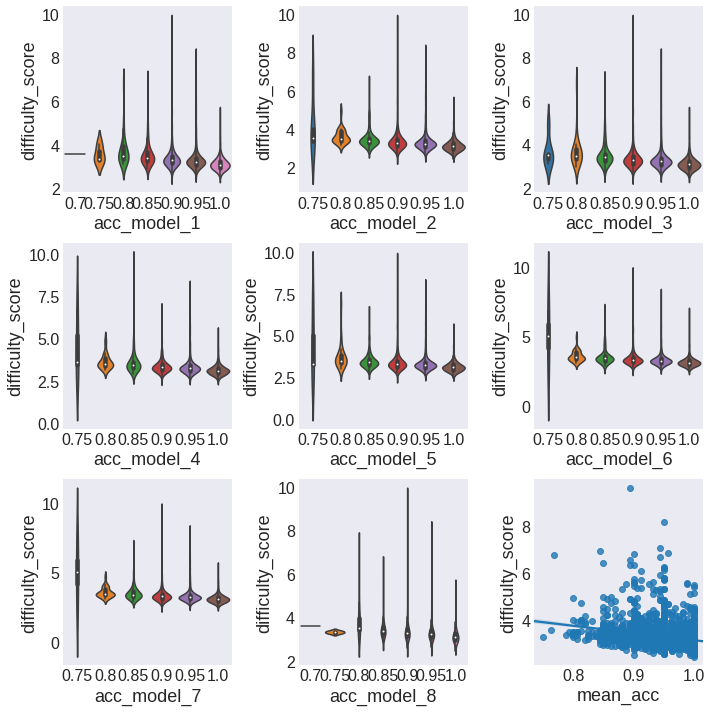

In [34]:
vsd_df_alexnet = pd.read_csv(vsd_results_csv_alexnet)
diff_score_v_mean_acc(vsd_df_alexnet)

### Alexnet results
Axes 1-8 are results for each training replicate.
Violin plots are used to show the distribution of scores.
Axes 9 is the correlation between the mean accuracy across all training replicates with the visual search difficulty score, for each image in the test set.

I have not measured the correlation, but my guess it is "weak but significant". The distribution of visual search difficulty scores is itself not very linear; the majority fall within the range of 2-3 with just a few extreme scores at either end (0-1 or 3-5).

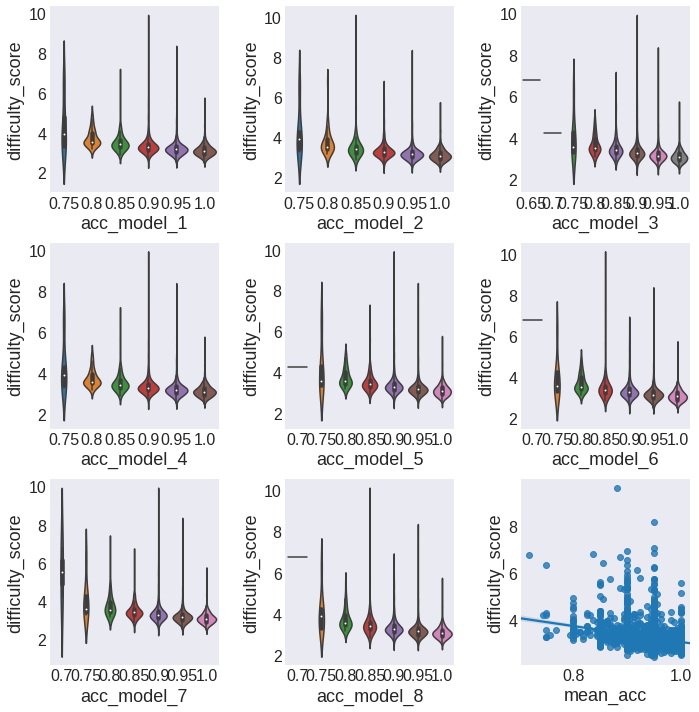

In [35]:
vsd_df_CORnet_Z = pd.read_csv(vsd_results_csv_cornet_z)
diff_score_v_mean_acc(vsd_df_CORnet_Z)

### CORnet Z results
Axes 1-8 are results for each training replicate.
Violin plots are used to show the distribution of scores.
Axes 9 is the correlation between the mean accuracy across all training replicates with the visual search difficulty score, for each image in the test set.

CORnet Z does not by eye appear to be significantly different from AlexNet.

One question is whether the CORNet model that incorporates more "brain-like" architectural constraints will provide different predictions.

In [36]:
vsd_df_alexnet['mean_err'] = 1 - vsd_df_alexnet['mean_acc']

In [37]:
vsd_df_CORnet_Z['mean_err'] = 1 - vsd_df_CORnet_Z['mean_acc']

In [38]:
def plot_mean_acc(ax, df, net, ylabel=False, xlim=(0.0, 0.26)):
    sns.regplot(x='mean_err', y="difficulty_score",
            data=df,
            ax=ax);
    ax.set_title(net)
    ax.set_xlabel('mean error')
    if ylabel:
        ax.set_ylabel('difficulty score')
    else:
        ax.set_ylabel('')
    ax.set_xlim(xlim)

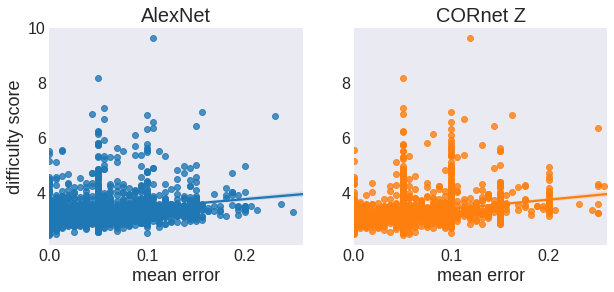

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax = ax.ravel()

plot_mean_acc(ax[0], vsd_df_alexnet, 'AlexNet', ylabel=True)

plot_mean_acc(ax[1], vsd_df_CORnet_Z, 'CORnet Z')

fig_filename = FIGDIR.joinpath('VSD_results.svg')
plt.savefig(fig_filename)

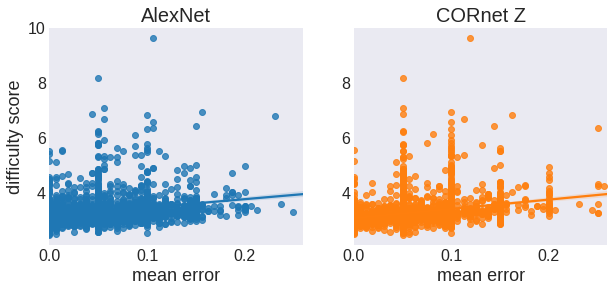

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax = ax.ravel()

plot_mean_acc(ax[0], vsd_df_alexnet, 'AlexNet', ylabel=True)

plot_mean_acc(ax[1], vsd_df_CORnet_Z, 'CORnet Z')

fig_filename = FIGDIR.joinpath('VSD_results.png')
plt.savefig(fig_filename)